In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
len(df.location.unique())

1306

In [5]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [6]:
RTM = df[df.availability=='Ready To Move']

In [7]:
len(RTM)/df.shape[0]

0.7943693693693694

In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
# ratio to nan society values to rest of data set
5502/df.shape[0]

0.41306306306306306

In [11]:
df['size'].describe()

count     13304
unique       31
top       2 BHK
freq       5199
Name: size, dtype: object

In [12]:
def draw_g(xlabel, ylabel, x, y, marker, color):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(x, y, marker=marker, color=color)

In [13]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

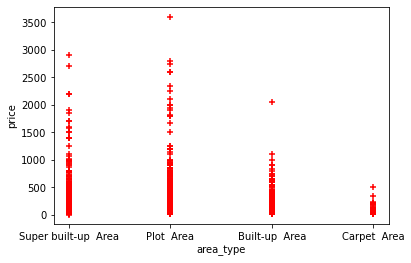

In [14]:
draw_g('area_type', 'price', df.area_type, df.price, '+', 'red')

<h1>Data cleaning</h1>
<h3>Data Reduction</h3>
<ul>
    <li>Remove <b>Society</b> column since roughly 40% of values are undefined</li>
    <li>Remove 16 values which are undefined in the <b>size</b> column</li>
    <li>For simplicity we will assume that the location is not important (although, it probably would be)</li>
    
</ul>

<h3>Data conversion</h3>
<ul>
    <li>Assume undefined values of the <b>Balconies</b> are 0</li>
    <li>Convert string values of <b>size</b> column to regular integers, so '2BHK' would become just 2</li>
    <li>Convert ready to move to the Dec 31 2017 and represent using timestamp for the <b>Availability</b> column</li>
    <li>Based on when data set was released, assume that the year we are working with is 2017</li>    
    <li>Get averages for the <b>Bath</b> column where values are nan</li>
</ul>

<h3>Data Reduction, reconsideration</h3>
<p>After going through some videos, removing the location column entirely may not be the best option and so what we can do instead is to reduce the amount of locations we have by extracting the most common cities, we will then categorise all the other points as just 'other'.</p>

<p>For the rest of the categorical data, use one-hot encoding</p>

In [15]:
df.drop(['society'], axis="columns", inplace=True)

In [16]:
df.dropna(axis=0, subset=['size'], inplace=True)

In [17]:
df.isna().sum()

area_type         0
availability      0
location          1
size              0
total_sqft        0
bath             57
balcony         593
price             0
dtype: int64

In [18]:
df.dropna(axis=0, subset=['location'], inplace=True)

In [19]:
df.balcony[:10]

0    1.0
1    3.0
2    3.0
3    1.0
4    1.0
5    1.0
6    NaN
7    NaN
8    1.0
9    NaN
Name: balcony, dtype: float64

In [20]:
import math
math.isnan(df.balcony[1])

False

In [21]:
df.balcony = df.balcony.apply(lambda x: 0 if math.isnan(x) else x )

In [22]:
df.isna().sum()

area_type        0
availability     0
location         0
size             0
total_sqft       0
bath            57
balcony          0
price            0
dtype: int64

In [23]:
df.fillna(value={ 'bath':df.bath.mean() }, inplace=True)

In [24]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [25]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [26]:
# testing to replace size values, since we have no null values we will just convert values to integers as well 
import re
int(re.search('\d+', '2 BHK').group(0))

2

In [27]:
df['size'] = df['size'].apply(lambda s: int(re.search('\d+', s).group(0)))

In [28]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00


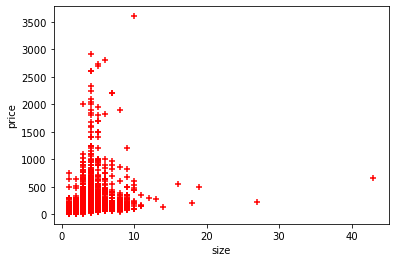

In [29]:
draw_g('size', 'price', df['size'], df.price, '+', 'red')

In [30]:
df.availability = df.availability.apply(lambda a: '22-dec-2017' if a=='Ready To Move' else (a+'-2017').lower())

In [31]:
df.availability

0        19-dec-2017
1        22-dec-2017
2        22-dec-2017
3        22-dec-2017
4        22-dec-2017
            ...     
13315    22-dec-2017
13316    22-dec-2017
13317    22-dec-2017
13318    18-jun-2017
13319    22-dec-2017
Name: availability, Length: 13303, dtype: object

In [32]:
import time
import datetime

In [33]:
def convert_string_month_to_num_equivalent (day):
    
    if (not isinstance(day, str)):
        return -1
    
    day = day.lower()
    
    if (re.match('jan', day)):
        return 1
    if (re.match('feb', day)):
        return 2   
    if (re.match('mar', day)):
        return 3       
    if (re.match('apr', day)):
        return 4   
    if (re.match('may', day)):
        return 5     
    if (re.match('jun', day)):
        return 6    
    if (re.match('jul', day)):
        return 7 
    if (re.match('aug', day)):
        return 8  
    if (re.match('sep', day)):
        return 9 
    if (re.match('oct', day)):
        return 10  
    if (re.match('nov', day)):
        return 11     
    if (re.match('dec', day)):
        return 12 
    
    return -1
    
def convert_string_date_to_timestamp (string_date):
# time stamp solutions: https://stackoverflow.com/questions/9637838/convert-string-date-to-timestamp-in-python#answer-9637908    
    [ day, month, year ] = string_date.split('-')
    month = convert_string_month_to_num_equivalent(month)
    if (month==-1): 
        month = 12
    
    try:
        day_ = int(day)
    except(ValueError):
        day = 31
        
        
    try:
        year = int(year)
    except(ValueError):
        year = 2017        
            
    t = "{day}/{month}/{year}".format(day=day, month=month, year=year)
    stamp = time.mktime(datetime.datetime.strptime(t, "%d/%m/%Y").timetuple())
    return stamp
    

In [34]:
df.availability = df.availability.apply(lambda x : convert_string_date_to_timestamp(x)) 

In [35]:
pd.get_dummies(df, drop_first=True)

,availability,size,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Banaswadi,location_ Basavangudi,...,total_sqft_990,total_sqft_991,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999
0,1.513642e+09,2,2.0,1.0,39.07,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.513901e+09,4,5.0,3.0,120.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.513901e+09,3,2.0,3.0,62.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.513901e+09,3,3.0,1.0,95.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.513901e+09,2,2.0,1.0,51.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,1.513901e+09,5,4.0,0.0,231.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,1.513901e+09,4,5.0,0.0,400.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1.513901e+09,2,2.0,1.0,60.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,1.497740e+09,4,4.0,1.0,488.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# for k in list(df.total_sqft):
#     print(type(k), k)

<h3>Turns out <b>total_sqft</b> column is of type string, but should be list of integers instead, also some values are ranges whilst  other include words, so we need to fix this by</h3>


<ul>
    <li>We will strip off non digits and convert into int</li>    
    <li>If we have a range, we will take the average</li>
</ul>

In [37]:
import functools
import numpy as np

def clean_sqft (data):
    matches = re.findall('\d+', data)
    if len(matches)==0:
        return np.na
    
    if (len(matches)==1):
        return int(matches[0])
    

    return functools.reduce((lambda a, b: int(a)+int(b)), matches) / len(matches)
    
    
    
clean_sqft('10 - 20 fdsfds- 25 - 90nice')

36.25

In [38]:
df.total_sqft = df.total_sqft.apply(lambda x: clean_sqft(x)  )
df.dropna(axis="rows", subset=['total_sqft'], inplace=True)

In [39]:
df.location = df.location.apply(lambda l: l.strip())

In [40]:
locationsummary = df.groupby('location')['location'].count()

In [41]:
locationsummary['Padmanabhanagar']

28

In [42]:
def retloc (loc):
    loc = loc.strip()
    try:
        return locationsummary[loc]
    except (KeyError):
        return 0
    
    return loc

In [43]:
# extract data points which are above the 6 standard deviations away from the mean
stdloc = locationsummary.std()
meanloc = locationsummary.mean()
quartile = meanloc + (6*stdloc) 
df['location-freq'] = df.location.apply(retloc)

In [44]:
filterLocation = df[df['location-freq'] > quartile].groupby('location')['location'].count().to_dict()
filterLocation

{'Electronic City': 304,
 'Kanakpura Road': 273,
 'Sarjapur  Road': 397,
 'Thanisandra': 237,
 'Whitefield': 540,
 'Yelahanka': 212}

In [45]:
prev_loc_freq_categories = len(df.location.unique())

In [46]:
df.location = df.location.apply(lambda l: l if l in filterLocation else 'other')

In [47]:
print('before', prev_loc_freq_categories, 'after', len(df.location.unique()))

before 1293 after 7


In [48]:
df = pd.get_dummies(df, drop_first=True)

In [49]:
df.columns

Index(['availability', 'size', 'total_sqft', 'bath', 'balcony', 'price',
       'location-freq', 'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'location_Kanakpura Road',
       'location_Sarjapur  Road', 'location_Thanisandra',
       'location_Whitefield', 'location_Yelahanka', 'location_other'],
      dtype='object')

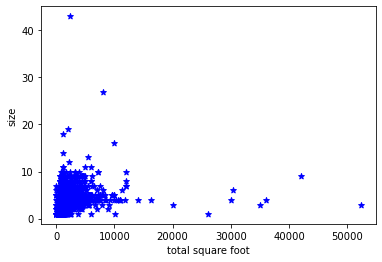

In [50]:
draw_g('total square foot', 'size', df['total_sqft'], df['size'], '*', 'blue')

<h3>Dealing with unrealistic values</h3>
<p>Looking at the graph above, we can some data points which that seem to be outliers, for example a house of SQFT of 50,000 having just maybe 3 or bedrooms is not realistic. Likewise, a house of about 5000 square foot having more than 40 rooms is not realistc either.<p/>


<p>Consequently, we will remove these values from our data by, finding the average ratio between TSQFT and SIZE, then we will remove anything more than 3 standard deviations away from this.</p>

In [51]:
df['sqft_to_size_ratio'] = df.total_sqft / df['size']

In [52]:
mean = df['sqft_to_size_ratio'].mean()
std = df['sqft_to_size_ratio'].std()
threshold = mean + 3*std 

In [53]:
len(df) * (len((df[df.sqft_to_size_ratio>=threshold])) / len((df[df.sqft_to_size_ratio< threshold])))

60.2718417277052

<b>From above, we can see that we will be losing about 60 data points<b/>

In [54]:
df = df[df.sqft_to_size_ratio< threshold]

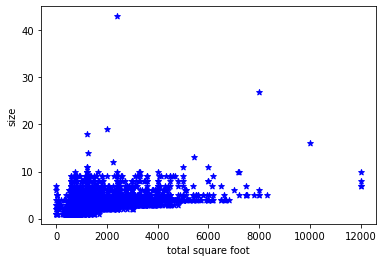

In [55]:
draw_g('total square foot', 'size', df['total_sqft'], df['size'], '*', 'blue')

<b>As we can see, the house at ~2000 with 40+ rooms is still here, we will remove this since this is most likely an anomaly </b>

In [56]:
df[df['size']>40]

,availability,size,total_sqft,bath,balcony,price,location-freq,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_Kanakpura Road,location_Sarjapur Road,location_Thanisandra,location_Whitefield,location_Yelahanka,location_other,sqft_to_size_ratio
4684,1.513901e+09,43,2400.0,40.0,0.0,660.0,24,0,1,0,0,0,0,0,0,1,55.813953


In [57]:
df.drop(axis=0, labels=[4684], inplace=True)

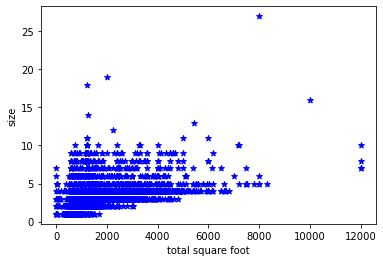

In [58]:
draw_g('total square foot', 'size', df['total_sqft'], df['size'], '*', 'blue')

In [59]:
df.head()

,availability,size,total_sqft,bath,balcony,price,location-freq,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_Kanakpura Road,location_Sarjapur Road,location_Thanisandra,location_Whitefield,location_Yelahanka,location_other,sqft_to_size_ratio
0,1.513642e+09,2,1056.0,2.0,1.0,39.07,132,0,0,1,0,0,0,0,0,1,528.0
1,1.513901e+09,4,2600.0,5.0,3.0,120.00,17,0,1,0,0,0,0,0,0,1,650.0
2,1.513901e+09,3,1440.0,2.0,3.0,62.00,186,0,0,0,0,0,0,0,0,1,480.0
3,1.513901e+09,3,1521.0,3.0,1.0,95.00,23,0,0,1,0,0,0,0,0,1,507.0
4,1.513901e+09,2,1200.0,2.0,1.0,51.00,66,0,0,1,0,0,0,0,0,1,600.0


In [60]:
df.drop('location-freq', axis="columns", inplace=True)

In [61]:
df.head()

,availability,size,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_Kanakpura Road,location_Sarjapur Road,location_Thanisandra,location_Whitefield,location_Yelahanka,location_other,sqft_to_size_ratio
0,1.513642e+09,2,1056.0,2.0,1.0,39.07,0,0,1,0,0,0,0,0,1,528.0
1,1.513901e+09,4,2600.0,5.0,3.0,120.00,0,1,0,0,0,0,0,0,1,650.0
2,1.513901e+09,3,1440.0,2.0,3.0,62.00,0,0,0,0,0,0,0,0,1,480.0
3,1.513901e+09,3,1521.0,3.0,1.0,95.00,0,0,1,0,0,0,0,0,1,507.0
4,1.513901e+09,2,1200.0,2.0,1.0,51.00,0,0,1,0,0,0,0,0,1,600.0


In [62]:
# draw_g('total square foot', 'size', df['total_sqft'], df['size'], '*', 'blue')

In [63]:
df.columns

Index(['availability', 'size', 'total_sqft', 'bath', 'balcony', 'price',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'location_Kanakpura Road',
       'location_Sarjapur  Road', 'location_Thanisandra',
       'location_Whitefield', 'location_Yelahanka', 'location_other',
       'sqft_to_size_ratio'],
      dtype='object')

In [64]:
df = df.rename(columns={ 'area_type_Carpet  Area':'area_type_Carpet', 
                   'area_type_Plot  Area':'area_type_Plot',
                      'area_type_Super built-up  Area':'area_type_Super_built-up',
                   'location_Kanakpura Road':'location_Kanakpura',
                   'location_Sarjapur  Road':'location_Sarjapur'
                  })

In [65]:
df.columns

Index(['availability', 'size', 'total_sqft', 'bath', 'balcony', 'price',
       'area_type_Carpet', 'area_type_Plot', 'area_type_Super_built-up',
       'location_Kanakpura', 'location_Sarjapur', 'location_Thanisandra',
       'location_Whitefield', 'location_Yelahanka', 'location_other',
       'sqft_to_size_ratio'],
      dtype='object')

In [66]:
df.drop('sqft_to_size_ratio', axis="columns", inplace=True)

<h1>Model</h1>
<p>Given we are trying to solve a regression problem, the i have opted to try out linear regression, L1 or lasso regression, with different parameters, and random forest (also with different parameters). We will then use grid search cv to make this possible and use cross validation in conjunction<p/>

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [68]:
X_ = df.drop('price', axis="columns")

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_, df['price'], test_size=0.5, random_state=70) 

In [70]:
def findFit (model, params, cv_, trainX, trainY):
    gcv = GridSearchCV(model, params, cv=cv_)
    gcv.fit(trainX, trainY)
    return gcv

In [71]:
lcv = findFit(LinearRegression(), {
    'fit_intercept':[True, False],
    'n_jobs':range(1, 15)
                   }, 5, X_, df['price'])

In [72]:
lcv.score(X_test, y_test)

0.5969492841611272

In [73]:
rcv = findFit(RandomForestRegressor(), {
    'n_estimators':[100, 150, 200, 250, 300],
                   }, 10, X_, df['price'])

In [74]:
rcv.score(X_test, y_test)

0.9172086151562633

In [75]:
lassocv = findFit(Lasso(), {
    'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                   }, 10, X_, df['price'])

In [76]:
lassocv.score(X_test, y_test)

0.5967451101822849

<h1>Model decision</h1>
<p>Out of all the models, random forest worked the best, it took a long time as you would expect but we got a score of ~92% compared to the ~60% of lasso and regular linear regression.</p>

<p>We will now save this to a joblib file so we can reuse the model.</p>

In [77]:
pd.DataFrame(rcv.cv_results_)[['params', 'rank_test_score']]

,params,rank_test_score
0,{'n_estimators': 100},2
1,{'n_estimators': 150},1
2,{'n_estimators': 200},4
3,{'n_estimators': 250},5
4,{'n_estimators': 300},3


In [78]:
from joblib import dump, load
dump(rcv, 'random_forest_model.joblib') 

['random_forest_model.joblib']

In [79]:
df.columns

Index(['availability', 'size', 'total_sqft', 'bath', 'balcony', 'price',
       'area_type_Carpet', 'area_type_Plot', 'area_type_Super_built-up',
       'location_Kanakpura', 'location_Sarjapur', 'location_Thanisandra',
       'location_Whitefield', 'location_Yelahanka', 'location_other'],
      dtype='object')

In [80]:
df.area

AttributeError: 'DataFrame' object has no attribute 'area'

In [ ]:
# from joblib import load
# __model = load('./Server/models/random_forest_model.joblib')

In [ ]:
# df.head(1)

In [ ]:
# __model.predict([ [1513641600.0,2.0,1056.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,528.0 ] ])